In [1]:
%matplotlib inline
import pynucastro as pyna
import numpy as np

Mesa 204 from 

mesa-r15140/data/net_data/nets/mesa_204.net

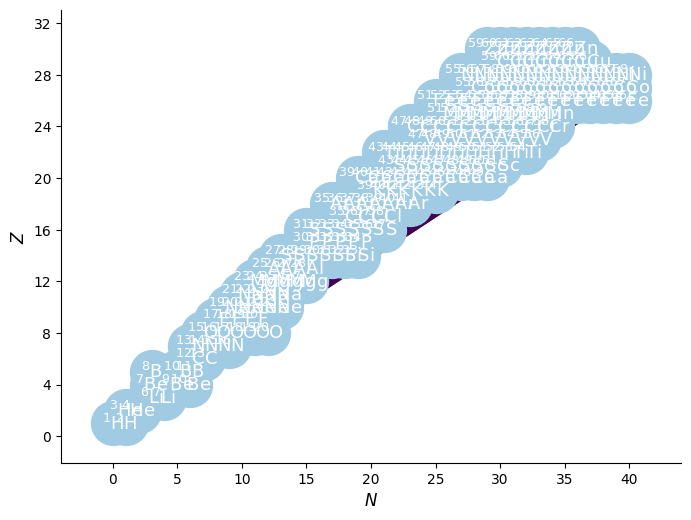

In [2]:
Nuclei = { 
    
    "h" : [1, 2],                                                                                                                  
    "he" : [3, 4],                                                                                                                  
    "li" : [6, 7],                                                                                                                  
    #"be" : [7],                                                                                                                    
    "be" : [7, 9, 10],                                                                                                                
    #"b"  : [8],                                                                                                                    
     "b" : [8, 10, 11],                                                                                                                
     "c" : [12, 13],                                                                                                                
     "n" : [13, 16],                                                                                                                
     "o" : [15, 19],                                                                                                                
     "f" : [17, 20],                                                                                                                
    "ne" : [19, 23],                                                                                                                
    "na" : [21, 24],                                                                                                                
    "mg" : [23, 27],                                                                                                                
    "al" : [25, 28],                                                                                                                
    "si" : [27, 33],                                                                                                                
     "p" : [30, 34],                                                                                                                
     "s" : [31, 37],                                                                                                                
    "cl" : [35, 38],                                                                                                                
    "ar" : [35, 41],                                                                                                               
     "k" : [39, 44],                                                                                                                
    "ca" : [39, 49],                                                                                                                
    "sc" : [43, 51],                                                                                                                
    "ti" : [43, 54],                                                                                                                
     "v" : [47, 56],                                                                                                                
    "cr" : [47, 58],                                                                                                                
    "mn" : [51, 59],                                                                                                                
    "fe" : [51, 66],                                                                                                                
    "co" : [55, 67],                                                                                                                
    "ni" : [55, 68],                                                                                                             
    "cu" : [59, 66],                                                                                                               
    "zn" : [59, 66]                                                                                                                
}
All_Nuclei = []
for Nuc, Num in Nuclei.items():
    if (len(Num)==1):
        All_Nuclei.append(Nuc + str(Num[0]))
    elif (len(Num) > 2):
        for i in Num:
            All_Nuclei.append(Nuc + str(i))
    else:
        for i in range(Num[0], Num[1]+1):
            All_Nuclei.append(Nuc + str(i))
All_Nuclei.append("n") #neutron
assert len(All_Nuclei) == 204



library_file = '../results07070315'
mylibrary = pyna.rates.Library(library_file)
escn_tabular = ["f20--o20-toki","ne20--f20-toki","o20--f20-toki","f20--ne20-toki"]
mesa_204_lib = mylibrary.linking_nuclei(All_Nuclei, with_reverse=True)

from pynucastro import Nucleus
new_rates = []
#screens out duplicate rates that we include in the escn_tabular.
for rate in mesa_204_lib.get_rates():
    if rate.reactants == [Nucleus("f20")] and rate.products == [Nucleus("o20")]:
        continue
    elif rate.reactants == [Nucleus("ne20")] and rate.products == [Nucleus("f20")]:
        continue
    elif rate.reactants == [Nucleus("o20")] and rate.products == [Nucleus("f20")]:
        continue
    elif rate.reactants == [Nucleus("f20")] and rate.products == [Nucleus("ne20")]:
        continue
    else:
        new_rates.append(rate)
        
mesa_204 = pyna.networks.StarKillerNetwork(rates = new_rates, rate_files=escn_tabular)
mesa_204.plot()

mesa_204.write_network()